INFOMHNA Lab Assignment 1

Christian Acosta - 6369251

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [30]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [31]:
(x_train.shape)

(60000, 28, 28)

Exercise one: Identifying handwritten numbers

Fully-connected neural networks

In [32]:
x_train_rs = x_train.reshape(60000, 784)

In [33]:
x_test_rs = x_test.reshape(10000, 784)

In [34]:
x_train_rs.shape
x_test_rs.shape

(10000, 784)

In [35]:
x_train_rs = x_train_rs/255

In [36]:
x_test_rs = x_test_rs/255

In [37]:
y_train_labels = keras.utils.to_categorical(y_train, 10)

In [38]:
y_test_labels = keras.utils.to_categorical(y_test, 10)

In [39]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [42]:
history = model.fit(x_train_rs, y_train_labels, batch_size=128, 
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 2s 3ms/step - loss: 0.3955 - accuracy: 0.8861 - val_loss: 0.3101 - val_accuracy: 0.9115
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.3098 - accuracy: 0.9118 - val_loss: 0.2825 - val_accuracy: 0.9218
Epoch 3/12
375/375 [==============================] - 1s 3ms/step - loss: 0.2961 - accuracy: 0.9164 - val_loss: 0.3060 - val_accuracy: 0.9129
Epoch 4/12
375/375 [==============================] - 1s 3ms/step - loss: 0.2888 - accuracy: 0.9187 - val_loss: 0.2980 - val_accuracy: 0.9180
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2834 - accuracy: 0.9216 - val_loss: 0.2872 - val_accuracy: 0.9202
Epoch 6/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2772 - accuracy: 0.9226 - val_loss: 0.2910 - val_accuracy: 0.9177
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2749 - accuracy: 0.9221 - val_loss: 0.2852 - val_accuracy: 0.9226
Epoch 

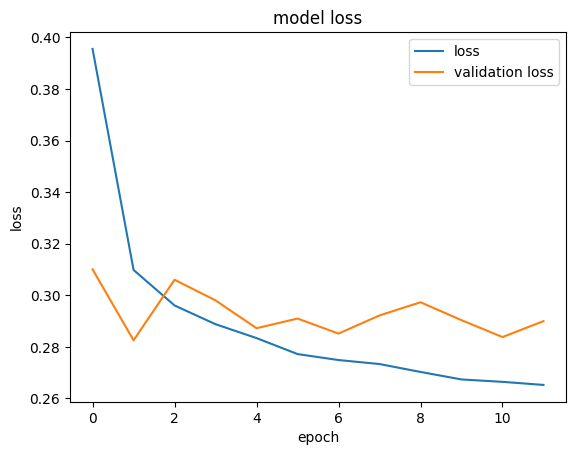

In [43]:
#Loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

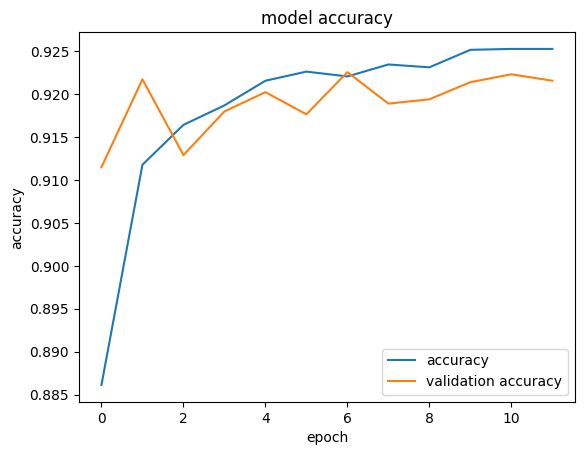

In [44]:
#Accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [45]:
loss, accuracy = model.evaluate(x_test_rs, y_test_labels, verbose=0)

In [46]:
print(loss, accuracy)

0.29034262895584106 0.919700026512146


Addition of RELU activation function

In [47]:
model_relu = keras.Sequential()
model_relu.add(keras.layers.Dense(256, input_shape=(784,), activation = 'relu'))
model_relu.add(keras.layers.Dense(10, activation='softmax'))

In [48]:
model_relu.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_relu.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [50]:
history_relu = model_relu.fit(x_train_rs, y_train_labels, batch_size=128, 
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 2s 3ms/step - loss: 0.3278 - accuracy: 0.9076 - val_loss: 0.1828 - val_accuracy: 0.9495
Epoch 2/12
375/375 [==============================] - 1s 3ms/step - loss: 0.1512 - accuracy: 0.9561 - val_loss: 0.1255 - val_accuracy: 0.9647
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9701 - val_loss: 0.1066 - val_accuracy: 0.9701
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.9774 - val_loss: 0.0917 - val_accuracy: 0.9720
Epoch 5/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0600 - accuracy: 0.9825 - val_loss: 0.0847 - val_accuracy: 0.9752
Epoch 6/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9863 - val_loss: 0.0843 - val_accuracy: 0.9739
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0392 - accuracy: 0.9889 - val_loss: 0.0775 - val_accuracy: 0.9764
Epoch 

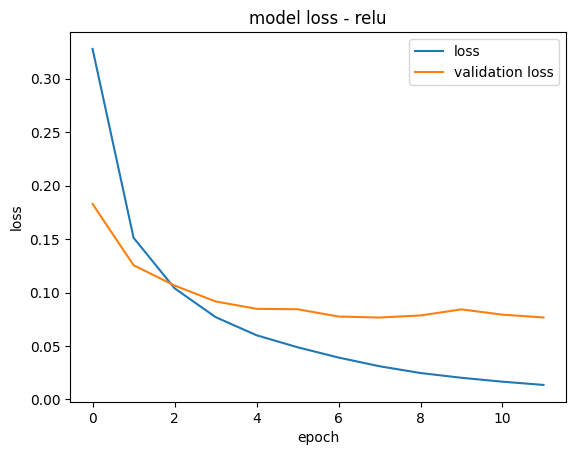

In [51]:
#Loss graph
plt.plot(history_relu.history['loss'])
plt.plot(history_relu.history['val_loss'])
plt.title('model loss - relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

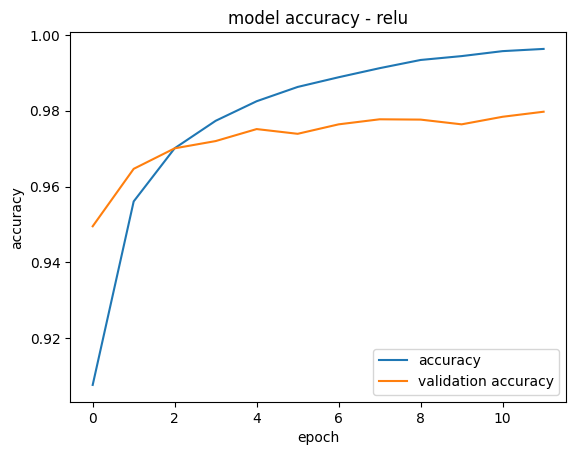

In [52]:
#Accuracy graph
plt.plot(history_relu.history['accuracy'])
plt.plot(history_relu.history['val_accuracy'])
plt.title('model accuracy - relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [53]:
loss_relu, accuracy_relu = model_relu.evaluate(x_test_rs, y_test_labels, verbose=0)

In [54]:
print(loss_relu, accuracy_relu)

0.06730839610099792 0.9800999760627747


Deep convolutional neural networks

In [55]:
x_train_deep = x_train.reshape(60000, 28, 28, 1)

In [56]:
x_test_deep = x_test.reshape(10000, 28, 28, 1)

In [57]:
x_train_deep = x_train_deep/255

In [58]:
x_test_deep = x_test_deep/255

In [60]:
model_dnn = keras.Sequential()
model_dnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu", input_shape=(28, 28, 1)))
model_dnn.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
activation="relu"))
model_dnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_dnn.add(keras.layers.Flatten())
model_dnn.add(keras.layers.Dense(128, activation="relu"))
model_dnn.add(keras.layers.Dense(10, activation="softmax"))
model_dnn.compile(loss='categorical_crossentropy')


In [61]:
model_dnn.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.Adadelta(learning_rate=1), 
metrics='accuracy')

In [62]:
history_dnn = model_dnn.fit(x_train_deep, y_train_labels, batch_size=128, 
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 5s 10ms/step - loss: 0.2190 - accuracy: 0.9316 - val_loss: 0.0690 - val_accuracy: 0.9798
Epoch 2/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0504 - accuracy: 0.9848 - val_loss: 0.0500 - val_accuracy: 0.9844
Epoch 3/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0308 - accuracy: 0.9906 - val_loss: 0.0468 - val_accuracy: 0.9840
Epoch 4/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0200 - accuracy: 0.9941 - val_loss: 0.0509 - val_accuracy: 0.9862
Epoch 5/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0443 - val_accuracy: 0.9886
Epoch 6/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0461 - val_accuracy: 0.9883


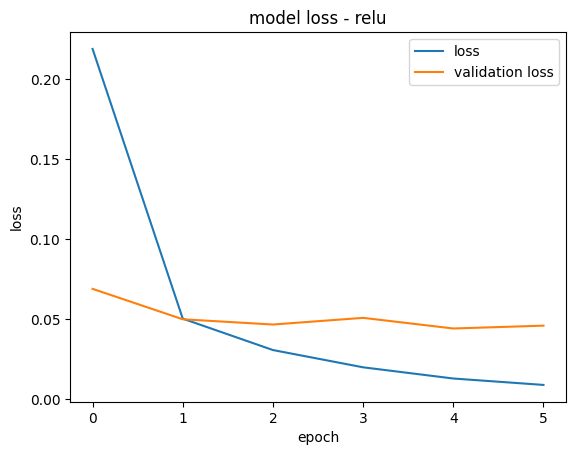

In [63]:
#Loss graph
plt.plot(history_dnn.history['loss'])
plt.plot(history_dnn.history['val_loss'])
plt.title('model loss - relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

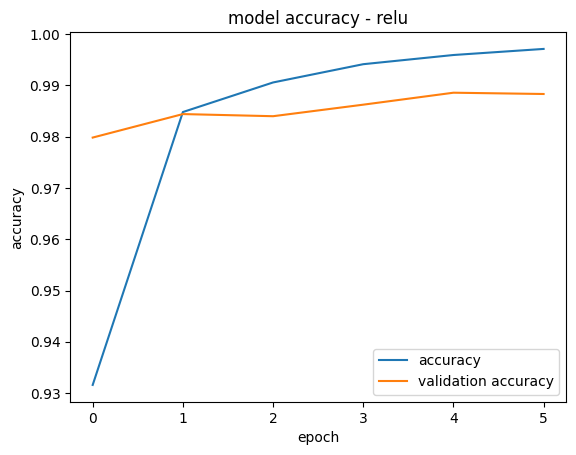

In [64]:
#Accuracy graph
plt.plot(history_dnn.history['accuracy'])
plt.plot(history_dnn.history['val_accuracy'])
plt.title('model accuracy - relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [65]:
loss_dnn, accuracy_dnn = model_dnn.evaluate(x_test_deep, y_test_labels, verbose=0)

In [66]:
print(loss_dnn, accuracy_dnn)

0.03312918543815613 0.9908999800682068


Dropout layers

In [67]:
model_dnn_dropout = keras.Sequential()
model_dnn_dropout.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu", input_shape=(28, 28, 1)))
model_dnn_dropout.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
activation="relu"))
model_dnn_dropout.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_dnn_dropout.add(keras.layers.Dropout(rate=0.25))
model_dnn_dropout.add(keras.layers.Flatten())
model_dnn_dropout.add(keras.layers.Dense(128, activation="relu"))
model_dnn_dropout.add(keras.layers.Dense(10, activation="softmax"))
model_dnn_dropout.add(keras.layers.Dropout(rate=0.50))
model_dnn_dropout.compile(loss='categorical_crossentropy')


In [68]:
model_dnn_dropout.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.Adadelta(learning_rate=1), 
metrics='accuracy')

In [69]:
history_dnn_dropout = model_dnn.fit(x_train_deep, y_train_labels, batch_size=128, 
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0430 - val_accuracy: 0.9887
Epoch 2/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0475 - val_accuracy: 0.9894
Epoch 3/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0504 - val_accuracy: 0.9891
Epoch 4/6
375/375 [==============================] - 3s 9ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0533 - val_accuracy: 0.9887
Epoch 5/6
375/375 [==============================] - 3s 9ms/step - loss: 8.9795e-04 - accuracy: 0.9998 - val_loss: 0.0556 - val_accuracy: 0.9891
Epoch 6/6
375/375 [==============================] - 3s 9ms/step - loss: 3.6254e-04 - accuracy: 0.9999 - val_loss: 0.0557 - val_accuracy: 0.9899


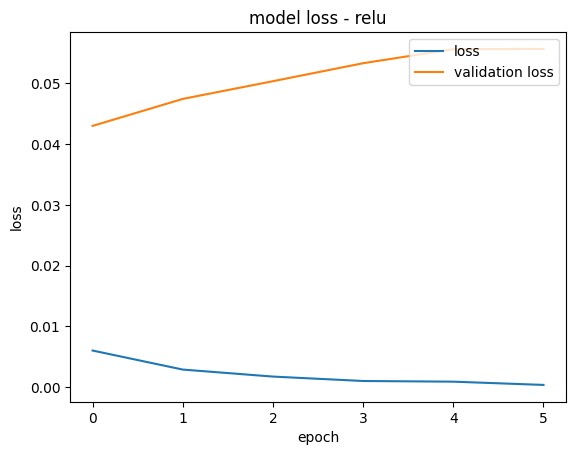

In [70]:
#Loss graph
plt.plot(history_dnn_dropout.history['loss'])
plt.plot(history_dnn_dropout.history['val_loss'])
plt.title('model loss - relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

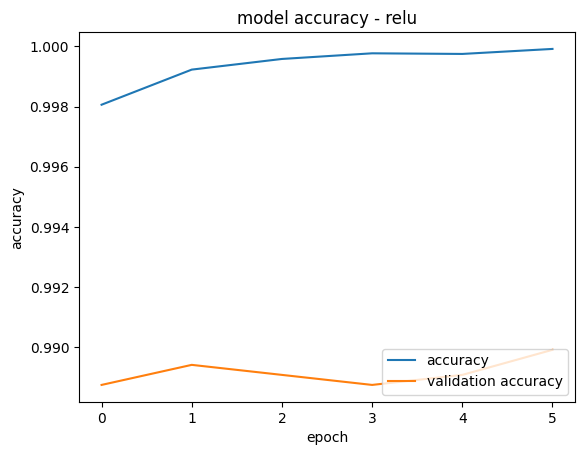

In [71]:
#Accuracy graph
plt.plot(history_dnn_dropout.history['accuracy'])
plt.plot(history_dnn_dropout.history['val_accuracy'])
plt.title('model accuracy - relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [72]:
loss_dnn_dropout, accuracy_dnn_dropout = model_dnn_dropout.evaluate(x_test_deep, y_test_labels, verbose=0)

In [73]:
#Check results --> don't seem to make sense
#generalizability seems to be very bad compared to no dropout model 
print(loss_dnn_dropout, accuracy_dnn_dropout)

2.299015998840332 0.12489999830722809


Exercise two: Identifying objects from images

In [22]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

In [23]:
x_train_cifar = x_train_cifar/255
x_test_cifar = x_test_cifar/255

In [24]:
y_train_cifar_labels = keras.utils.to_categorical(y_train_cifar, 10)
y_test_cifar_labels = keras.utils.to_categorical(y_test_cifar, 10)

In [25]:
model_dnn_cifar = keras.Sequential()
model_dnn_cifar.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu", input_shape=(32, 32, 3), padding = 'same'))
model_dnn_cifar.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu"))
model_dnn_cifar.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_dnn_cifar.add(keras.layers.Dropout(rate=0.25))
model_dnn_cifar.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu", padding = 'same'))
model_dnn_cifar.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu"))
model_dnn_cifar.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_dnn_cifar.add(keras.layers.Dropout(rate=0.25))
model_dnn_cifar.add(keras.layers.Flatten())
model_dnn_cifar.add(keras.layers.Dense(512, activation="relu"))
model_dnn_cifar.add(keras.layers.Dense(10, activation="softmax"))
model_dnn_cifar.add(keras.layers.Dropout(rate=0.50))
model_dnn_cifar.compile(loss='categorical_crossentropy')

In [26]:
model_dnn_cifar.compile(loss='categorical_crossentropy', 
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001,
weight_decay=1e-6), 
metrics='accuracy')

In [27]:
history_dnn_cifar = model_dnn_cifar.fit(x_train_cifar, y_train_cifar_labels, batch_size=32, 
epochs=20, verbose=1, validation_data=(x_test_cifar, y_test_cifar_labels), shuffle = True)

Epoch 1/20


2023-02-18 00:10:14.837499: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 11s 6ms/step - loss: nan - accuracy: 0.2100 - val_loss: 1.6973 - val_accuracy: 0.3810
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: nan - accuracy: 0.2793 - val_loss: 1.5487 - val_accuracy: 0.4280
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: nan - accuracy: 0.3027 - val_loss: 1.4398 - val_accuracy: 0.4737
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: nan - accuracy: 0.3179 - val_loss: 1.3375 - val_accuracy: 0.5179
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: nan - accuracy: 0.3242 - val_loss: 1.2910 - val_accuracy: 0.5404
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: nan - accuracy: 0.3356 - val_loss: 1.3568 - val_accuracy: 0.5169
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: nan - accuracy: 0.3429 - val_loss: 1.2263 - val_accuracy: 0.5606
Epoch 8/20
1563/1563 [=

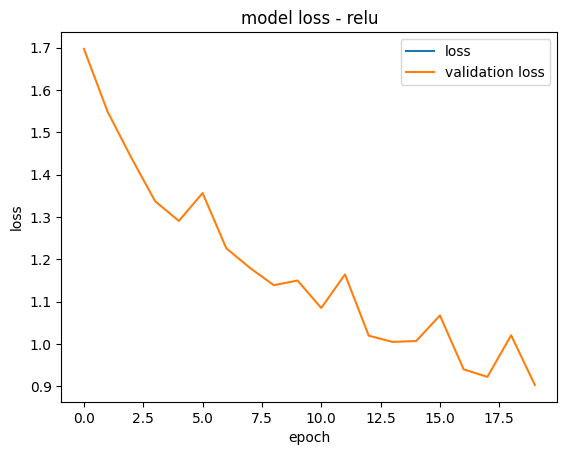

In [28]:
#Loss graph
plt.plot(history_dnn_cifar.history['loss'])
plt.plot(history_dnn_cifar.history['val_loss'])
plt.title('model loss - relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

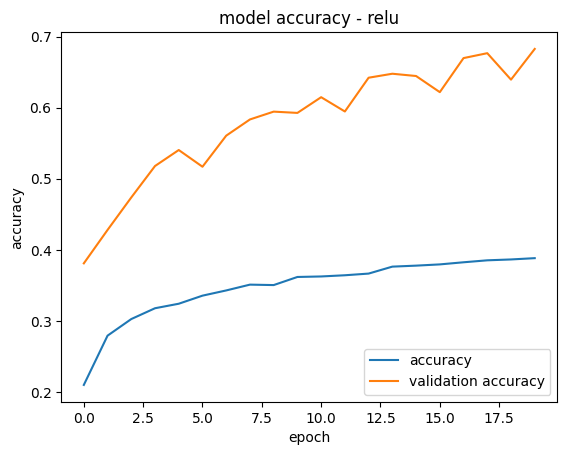

In [29]:
#Accuracy graph
plt.plot(history_dnn_cifar.history['accuracy'])
plt.plot(history_dnn_cifar.history['val_accuracy'])
plt.title('model accuracy - relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

Exercise three: Low-level functions

Write a simple function that achieves the convolution operation efficiently for two-
dimensional and three-dimensional inputs. This should allow you to input a set of
convolutional filters (‘kernels’ in Keras’s terminology) and an input layer (or image)
as inputs. The input layer should have a third dimension, representing a stack of
feature maps, and each filter should have a third dimension of corresponding size.
The function should output a number of two-dimensional feature maps
corresponding to the number of input filters, though these can be stacked into a third
dimensional like the input layer.
In your answer, please give the code you have written (yourselves). Also include an
example input image (for example from the mnist set) and the same image
convolved with two 3x3 filters, one detecting horizontal edges and the other
detecting vertical edges

Write a simple function that achieves rectified linear (relu) activation over a whole
feature map, with a threshold at zero. In your answer, give the code you have written
and one of the previous convolved images after this operation. 

Write a simple function that achieves max pooling. This should allow you to specify
the spatial extent of the pooling, with the size of the output feature map changing
accordingly. In your answer, give the code you have written and the image from the
previous question after pooling with a 2x2 kernal. 

Write a simple function that achieves normalisation within each feature map,
modifying the feature map so that its mean value is zero and its standard deviation is
one. In your answer, give the code you have written. 

Write a function that produces a fully-connected layer. This should allow you to
specify the number of output nodes, and link each of these to every node in an input
stack of feature maps. You should probably begin by flattening this stack of feature
maps into a 1-dimensional matrix. In your answer, give the code you have written.

Write a function that converts the activation of a 1-dimensional matrix (such as the
output of a fully-connected layer) into a set of probabilities that each matrix element
11
is the most likely classification. This should include the algorithmic expression of a
softmax (normalised exponential) function. In your answer, give the code you have
written. 